<a href="https://colab.research.google.com/github/oshimamasara/ABC-Handwriting-AI-Checker-App/blob/master/get-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.nist.gov/srd/nist-special-database-19
!curl -LO https://s3.amazonaws.com/nist-srd/SD19/by_field.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  515M  100  515M    0     0  66.8M      0  0:00:07  0:00:07 --:--:-- 63.9M


In [0]:
import zipfile
with zipfile.ZipFile("by_field.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [3]:
# データセット　原型の様子　A について
import os

dir_number = [0,1,2,3,4,6,7]
total_file_count = 0

for i in dir_number:
  A_dir  = "/content/targetdir/by_field/hsf_"+ str(i) + "/upper/41/"
  file_count = sum([len(files) for r, d, files in os.walk(A_dir)])
  print("ディレクトリ：" + A_dir + "　Aのファイル数：" + str(file_count))
  total_file_count = total_file_count + file_count 

print("Aのファイル数合計：" + str(total_file_count))

ディレクトリ：/content/targetdir/by_field/hsf_0/upper/41/　Aのファイル数：385
ディレクトリ：/content/targetdir/by_field/hsf_1/upper/41/　Aのファイル数：406
ディレクトリ：/content/targetdir/by_field/hsf_2/upper/41/　Aのファイル数：395
ディレクトリ：/content/targetdir/by_field/hsf_3/upper/41/　Aのファイル数：463
ディレクトリ：/content/targetdir/by_field/hsf_4/upper/41/　Aのファイル数：459
ディレクトリ：/content/targetdir/by_field/hsf_6/upper/41/　Aのファイル数：476
ディレクトリ：/content/targetdir/by_field/hsf_7/upper/41/　Aのファイル数：449
Aのファイル数合計：3033


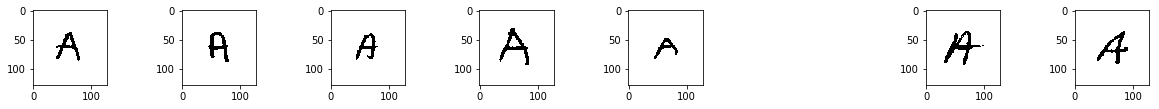

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=1)

for i in dir_number:
  A  = "/content/targetdir/by_field/hsf_"+ str(i) + "/upper/41/41_00000.png"
  img = Image.open(A)
  npA = np.asarray(img)
  plt.subplot(1,8,i+1)
  plt.imshow(npA)

In [5]:
# get image size   Numpy Pillow PyGame
from PIL import Image
from glob import glob                                                           
import cv2 

sample_images = glob('/content/targetdir/by_field/hsf_0/upper/41/*.png')

for i in sample_images[0:5]:
  with Image.open(i) as img:
    width, height = img.size
    print("ファイル名：" + i + "　幅：" + str(width) + "　高さ：" + str(height))

ファイル名：/content/targetdir/by_field/hsf_0/upper/41/41_00339.png　幅：128　高さ：128
ファイル名：/content/targetdir/by_field/hsf_0/upper/41/41_00233.png　幅：128　高さ：128
ファイル名：/content/targetdir/by_field/hsf_0/upper/41/41_00009.png　幅：128　高さ：128
ファイル名：/content/targetdir/by_field/hsf_0/upper/41/41_00056.png　幅：128　高さ：128
ファイル名：/content/targetdir/by_field/hsf_0/upper/41/41_00308.png　幅：128　高さ：128


In [6]:
# all png?

# check file type  All .png ?

check_pngs = glob('/content/targetdir/by_field/**/upper/**/*.png')
print(check_pngs[0:100])
print(len(check_pngs))

check_pngs_A = glob('/content/targetdir/by_field/**/upper/41/*.png')
print(len(check_pngs_A))
len(check_pngs_A) == total_file_count

['/content/targetdir/by_field/hsf_6/upper/4b/4B_00310.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00235.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00050.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00114.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00162.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00142.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00320.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00191.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00175.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00276.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00045.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00201.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00145.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00270.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00128.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00030.png', '/content/targetdir/by_field/hsf_6/upper/4b/4B_00239.pn

True

In [7]:
#  How to check .png
check_png_file = glob('/content/targetdir/by_field/**/upper/**/*.png')

print(".png のファイル形式を確認")
for i in check_png_file[0:5]:
  print("ファイル名：　" + i)
  print(".png？　" + i[-4:-1])
  print(".pn" in i[-4:-1])

.png のファイル形式を確認
ファイル名：　/content/targetdir/by_field/hsf_6/upper/4b/4B_00310.png
.png？　.pn
True
ファイル名：　/content/targetdir/by_field/hsf_6/upper/4b/4B_00235.png
.png？　.pn
True
ファイル名：　/content/targetdir/by_field/hsf_6/upper/4b/4B_00050.png
.png？　.pn
True
ファイル名：　/content/targetdir/by_field/hsf_6/upper/4b/4B_00114.png
.png？　.pn
True
ファイル名：　/content/targetdir/by_field/hsf_6/upper/4b/4B_00162.png
.png？　.pn
True


In [8]:
for i in check_png_file[0:5]:
  boolean = ".pn" in i[-4:-1]
  print("ファイル名： " + i)
  if boolean:
    print(".png有")
  else:
    print(".png以外あり")

ファイル名： /content/targetdir/by_field/hsf_6/upper/4b/4B_00310.png
.png有
ファイル名： /content/targetdir/by_field/hsf_6/upper/4b/4B_00235.png
.png有
ファイル名： /content/targetdir/by_field/hsf_6/upper/4b/4B_00050.png
.png有
ファイル名： /content/targetdir/by_field/hsf_6/upper/4b/4B_00114.png
.png有
ファイル名： /content/targetdir/by_field/hsf_6/upper/4b/4B_00162.png
.png有


In [9]:
loop_ok = False
check_png_total = 0

for i in check_png_file:
  if loop_ok:
    pass
  else:
    print(".png check Loop Start!")
    loop_ok = True
    
  boolean = ".pn" in i[-4:-1]
  if boolean:
    check_png_total = check_png_total + 1
  else:
    print("★ .png 以外有り")
    
print("ファイルチェック対象数： " + str(len(check_png_file)))
print("ファイルチェック数： " + str(check_png_total))
check_png_total == len(check_pngs)

.png check Loop Start!
ファイルチェック対象数： 81463
ファイルチェック数： 81463


True

全部 .png

次はディレクトリの整理

In [0]:
import shutil

for i in dir_number:
  data = "/content/targetdir/by_field/hsf_"+ str(i) + "/upper/"  #コピー元
  dst="DATA/"+str(i) #コピー先
  shutil.copytree(src=data, dst=dst)

In [11]:
!ls DATA/

check_count_files = glob('/content/DATA/**/**/*.png')
print(len(check_count_files))
len(check_count_files) == len(check_pngs)

0  1  2  3  4  6  7
81463


True

#### データ移動できたので元データ削除

In [12]:
%rm -r sample_data targetdir by_field.zip
!ls

DATA


#### 次はフォルダ整理（A-Zシンプルに）

現状

A

+ DATA/0/41
+ DATA/1/41

B

+ DATA/0/42
+ DATA/1/42

J

+ DATA/0/4a
+ DATA/1/4a

<hr>

A

+ DATA/A にまとめる
+ DATA/B にまとめる


#### 作戦
現状の DATA/△/〇〇 内にある .png を DATA/A に移動。
2重Loop
```
for first_dir in △:
  for second_dir in 〇〇:
    DATA/A に .png をコピペ
```

ところで DATA/△/〇〇 の 丸々は

In [13]:
first_dir = glob("DATA/*")
print(first_dir)

for first_loop in first_dir:
  second_dir = glob(first_loop + "/*/")
  print(second_dir)

['DATA/1', 'DATA/6', 'DATA/7', 'DATA/3', 'DATA/2', 'DATA/0', 'DATA/4']
['DATA/1/4b/', 'DATA/1/4e/', 'DATA/1/47/', 'DATA/1/54/', 'DATA/1/49/', 'DATA/1/57/', 'DATA/1/53/', 'DATA/1/41/', 'DATA/1/42/', 'DATA/1/55/', 'DATA/1/46/', 'DATA/1/59/', 'DATA/1/48/', 'DATA/1/4f/', 'DATA/1/52/', 'DATA/1/56/', 'DATA/1/4c/', 'DATA/1/45/', 'DATA/1/4a/', 'DATA/1/4d/', 'DATA/1/50/', 'DATA/1/51/', 'DATA/1/44/', 'DATA/1/5a/', 'DATA/1/58/', 'DATA/1/43/']
['DATA/6/4b/', 'DATA/6/4e/', 'DATA/6/47/', 'DATA/6/54/', 'DATA/6/49/', 'DATA/6/57/', 'DATA/6/53/', 'DATA/6/41/', 'DATA/6/42/', 'DATA/6/55/', 'DATA/6/46/', 'DATA/6/59/', 'DATA/6/48/', 'DATA/6/4f/', 'DATA/6/52/', 'DATA/6/56/', 'DATA/6/4c/', 'DATA/6/45/', 'DATA/6/4a/', 'DATA/6/4d/', 'DATA/6/50/', 'DATA/6/51/', 'DATA/6/44/', 'DATA/6/5a/', 'DATA/6/58/', 'DATA/6/43/']
['DATA/7/4b/', 'DATA/7/4e/', 'DATA/7/47/', 'DATA/7/54/', 'DATA/7/49/', 'DATA/7/57/', 'DATA/7/53/', 'DATA/7/41/', 'DATA/7/42/', 'DATA/7/55/', 'DATA/7/46/', 'DATA/7/59/', 'DATA/7/48/', 'DATA/7/4f/', 'D

取得するディレクトリ情報、並び順はバラバラ
ABC 順番コピーするようにディレクトリを順番通りに読み込む必要が...

In [14]:
first_dir = glob("DATA/*")
first_dir = sorted(first_dir)
print(first_dir)

for first_loop in first_dir:
  second_dir = glob(first_loop + "/*/")
  second_dir = sorted(second_dir)
  print(second_dir)

['DATA/0', 'DATA/1', 'DATA/2', 'DATA/3', 'DATA/4', 'DATA/6', 'DATA/7']
['DATA/0/41/', 'DATA/0/42/', 'DATA/0/43/', 'DATA/0/44/', 'DATA/0/45/', 'DATA/0/46/', 'DATA/0/47/', 'DATA/0/48/', 'DATA/0/49/', 'DATA/0/4a/', 'DATA/0/4b/', 'DATA/0/4c/', 'DATA/0/4d/', 'DATA/0/4e/', 'DATA/0/4f/', 'DATA/0/50/', 'DATA/0/51/', 'DATA/0/52/', 'DATA/0/53/', 'DATA/0/54/', 'DATA/0/55/', 'DATA/0/56/', 'DATA/0/57/', 'DATA/0/58/', 'DATA/0/59/', 'DATA/0/5a/']
['DATA/1/41/', 'DATA/1/42/', 'DATA/1/43/', 'DATA/1/44/', 'DATA/1/45/', 'DATA/1/46/', 'DATA/1/47/', 'DATA/1/48/', 'DATA/1/49/', 'DATA/1/4a/', 'DATA/1/4b/', 'DATA/1/4c/', 'DATA/1/4d/', 'DATA/1/4e/', 'DATA/1/4f/', 'DATA/1/50/', 'DATA/1/51/', 'DATA/1/52/', 'DATA/1/53/', 'DATA/1/54/', 'DATA/1/55/', 'DATA/1/56/', 'DATA/1/57/', 'DATA/1/58/', 'DATA/1/59/', 'DATA/1/5a/']
['DATA/2/41/', 'DATA/2/42/', 'DATA/2/43/', 'DATA/2/44/', 'DATA/2/45/', 'DATA/2/46/', 'DATA/2/47/', 'DATA/2/48/', 'DATA/2/49/', 'DATA/2/4a/', 'DATA/2/4b/', 'DATA/2/4c/', 'DATA/2/4d/', 'DATA/2/4e/', 'D

準備OK　コピペ開始

貼り付け先の A-Z ディレクトリ作成

In [15]:
print(chr(ord("A")))
print(chr(ord("A") + 1))

A
B


In [16]:
chr(11299)

'Ⱓ'

In [17]:
new_dir_list = [] 
print(new_dir_list)

new_dir_list_name = 'A'
for i in range(0, 26): 
    new_dir_list.append(new_dir_list_name) 
    new_dir_list_name = chr(ord(new_dir_list_name) + 1)
    
print(new_dir_list)

[]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [18]:
len(new_dir_list)

26

In [0]:
for d in new_dir_list:
  os.mkdir("DATA/" + d)

貼り付け先の A-Z ディレクトリ完成した

次は A-Z に .png をコピペ

と、その前に　DATA/0/41/以下　と DATA/1/41/以下　ファイル名一緒

+ DATA/0/41/以下 は、内容 A
+ DATA/1/41/以下 も　内容 A
+ DATA/2/41/以下 も　内容 A

つまりファイルが DATA/A で重複し、実際のデータ数より少なくなる

今回は事前にファイル名を「名前変更」して処理

In [0]:
# ReName
i = 0

dir_number = sorted(dir_number)

for loop1 in dir_number: # 1, 2, 3, 4 ・・・
  first_dir = glob("DATA/" + str(loop1) + "/*/") # ['DATA/0/47/', 'DATA/0/53/', 'DATA/0/51/'
  first_dir = sorted(first_dir)

  for loop2 in first_dir:
    copy_files = glob(str(loop2) + '*.png') #['DATA/0/41/41_00164.png', 'DATA/0/41/41_00027.png'
    
    for s in copy_files:
      #print(s)
      renames = s[:-4] #.png をカット
      renames = renames + "_" + str(i) + ".png"
      #print(renames)
      os.rename(s, renames)
      #print(s)
  
  i = i+1

全 .png ファイル名がオリジナルなものになったので、 A は DATA/A 、 B は DATA/B に集約

In [21]:
p = 0 #コピペするファイル数のカウンター
m = 0 #コピペを実行した回数のカウンター
n = 0 #貼付け先を指定するためのナンバー 0 なら A、 1 なら B
loop1_times = 0 #クロールしているフォルダをマーク0なら DATA/0、 1ならDATA/1

dir_number = sorted(dir_number)

# ディレクトリ A-Z 順番に A, B, C 貼り付けれるように
for loop1 in dir_number: #dir_number = [0,1,2,3,4,6,7]  
  print("**********************************************************")
  first_dir = glob("DATA/" + str(loop1) + "/*/")
  first_dir = sorted(first_dir)
  loop1_times = loop1_times + 1
  print("回数" + str(loop1_times))
  #print(first_dir) # ['DATA/0/41/', 'DATA/0/42/', 

  for loop2 in first_dir:
    print("---------------------------------------------------------------")
    loop2_times = n+1
    copy_files = glob(str(loop2) + '*.png')
    #print("コピペするファイル数：　" + str(len(copy_files)))
    p = p + len(copy_files) #カウンター用 対象ファイル数
    paste = "DATA/" + new_dir_list[n] # 貼り付け先 A, B, C...

    for s in copy_files:
      loop3_times = m
      print("★★  " + str(loop1_times) + "-" + str(loop2_times) + "-" + str(loop3_times))
      print("保存先：" + paste )
      
      shutil.copy2( s , paste)
      print(s)
      m = m + 1 #カウンター用 コピペした回数

    print("copy_files OK\n")
    n = n + 1

  print("★★for文： loop2 終了★★")
  n = 0


print("コピペしたファイル数：　" + str(p))
print("コピペした回数：　" + str(m))
int(p)==len(check_pngs)
m==p==len(check_pngs)


**********************************************************
回数1
---------------------------------------------------------------
★★  1-1-0
保存先：DATA/A
DATA/0/41/41_00039_0.png
★★  1-1-1
保存先：DATA/A
DATA/0/41/41_00382_0.png
★★  1-1-2
保存先：DATA/A
DATA/0/41/41_00218_0.png
★★  1-1-3
保存先：DATA/A
DATA/0/41/41_00208_0.png
★★  1-1-4
保存先：DATA/A
DATA/0/41/41_00316_0.png
★★  1-1-5
保存先：DATA/A
DATA/0/41/41_00045_0.png
★★  1-1-6
保存先：DATA/A
DATA/0/41/41_00014_0.png
★★  1-1-7
保存先：DATA/A
DATA/0/41/41_00114_0.png
★★  1-1-8
保存先：DATA/A
DATA/0/41/41_00340_0.png
★★  1-1-9
保存先：DATA/A
DATA/0/41/41_00026_0.png
★★  1-1-10
保存先：DATA/A
DATA/0/41/41_00252_0.png
★★  1-1-11
保存先：DATA/A
DATA/0/41/41_00288_0.png
★★  1-1-12
保存先：DATA/A
DATA/0/41/41_00377_0.png
★★  1-1-13
保存先：DATA/A
DATA/0/41/41_00323_0.png
★★  1-1-14
保存先：DATA/A
DATA/0/41/41_00279_0.png
★★  1-1-15
保存先：DATA/A
DATA/0/41/41_00227_0.png
★★  1-1-16
保存先：DATA/A
DATA/0/41/41_00068_0.png
★★  1-1-17
保存先：DATA/A
DATA/0/41/41_00222_0.png
★★  1-1-18
保存先：DATA/A
DATA/0/41/41_00

True

うまくいった？

A-Z のファイル数を改めて確認


In [22]:
oktotal_file_count = 0

for i in new_dir_list:
  ok_dir  = "DATA/" + i +"/"
  #print(i)
  file_count = sum([len(files) for r, d, files in os.walk(ok_dir)])
  print("ディレクトリ：" + ok_dir + "　ファイル数：" + str(file_count))
  oktotal_file_count = oktotal_file_count + file_count 

print("DATA内の合計ファイル数：" + str(oktotal_file_count))

ディレクトリ：DATA/A/　ファイル数：3033
ディレクトリ：DATA/B/　ファイル数：3026
ディレクトリ：DATA/C/　ファイル数：3344
ディレクトリ：DATA/D/　ファイル数：3020
ディレクトリ：DATA/E/　ファイル数：2892
ディレクトリ：DATA/F/　ファイル数：3053
ディレクトリ：DATA/G/　ファイル数：2964
ディレクトリ：DATA/H/　ファイル数：2925
ディレクトリ：DATA/I/　ファイル数：4490
ディレクトリ：DATA/J/　ファイル数：2958
ディレクトリ：DATA/K/　ファイル数：2850
ディレクトリ：DATA/L/　ファイル数：3375
ディレクトリ：DATA/M/　ファイル数：3077
ディレクトリ：DATA/N/　ファイル数：3128
ディレクトリ：DATA/O/　ファイル数：3176
ディレクトリ：DATA/P/　ファイル数：3127
ディレクトリ：DATA/Q/　ファイル数：3018
ディレクトリ：DATA/R/　ファイル数：3061
ディレクトリ：DATA/S/　ファイル数：3129
ディレクトリ：DATA/T/　ファイル数：2981
ディレクトリ：DATA/U/　ファイル数：3143
ディレクトリ：DATA/V/　ファイル数：3237
ディレクトリ：DATA/W/　ファイル数：3122
ディレクトリ：DATA/X/　ファイル数：3203
ディレクトリ：DATA/Y/　ファイル数：2966
ディレクトリ：DATA/Z/　ファイル数：3165
DATA内の合計ファイル数：81463


DATA/A   DATA/B  に編集できたので、いらなくなった DATA/0   　DATA/1 を消す

そして DATA フォルダを圧縮（zip）して、データセットとして使えるように

In [0]:
for r in dir_number:
  shutil.rmtree("DATA/"+str(r))

In [24]:
shutil.make_archive('ABC_data', 'zip', root_dir='DATA')
# 51MB

'/content/ABC_data.zip'

In [0]:
!rm -r DATA